<h1 align="center"> Predicting the Next Crypto Coin/Token Star Using Machine Learning </h1>

<h2 align="center"> Advanced Seminar Information Management </h2>

<h3 align="center"> Supervisor Prof. Dr. Schoder </h3>
  
<h4 align="center"> Pascal Grewe & Andrej Kotsovolos </h4>


# 3. Prediction

## 3.1 Multi-in-Single-Out Neural Network

In [ ]:
# imports
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM, Conv1D, MaxPooling1D, Concatenate, BatchNormalization
from keras.layers import CuDNNLSTM
from keras.models import Sequential, Functional
from keras import layers, Input, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, mean_absolute_percentage_error

%matplotlib inline


In [ ]:
# load datasets

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/bitcoin_quant.csv"
bitcoin = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/ethereum_quant.csv"
ethereum = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/avalanche_quant.csv"
avalanche = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/cardano_quant.csv"
cardano = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/monero_quant.csv"
monero = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/ripple_quant.csv"
ripple = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/solana_quant.csv"
solana = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/stellar_quant.csv"
stellar = pd.read_csv(link)

In [ ]:
link = "https://raw.githubusercontent.com/akotsovo/ASIM-Coins/main/clean/coins/new/tether_quant.csv"
tether = pd.read_csv(link)

In [ ]:
# set index to date
bitcoin = bitcoin.set_index('date')
ethereum = ethereum.set_index('date')
ripple = ripple.set_index('date')
monero = monero.set_index('date')
stellar = stellar.set_index('date')
tether = tether.set_index('date')
avalanche = avalanche.set_index('date')
cardano = cardano.set_index('date')
solana = solana.set_index('date')


In [ ]:
y = bitcoin["avalanche_prices"]

In [ ]:
# scale data
scaler = MinMaxScaler()

bitcoin = scaler.fit_transform(bitcoin.values.reshape(-1, 1))
ethereum = scaler.fit_transform(ethereum.values.reshape(-1, 1))
tether = scaler.fit_transform(tether.values.reshape(-1, 1))
avalanche = scaler.fit_transform(avalanche.values.reshape(-1, 1))
ripple = scaler.fit_transform(ripple.values.reshape(-1, 1))
stellar = scaler.fit_transform(stellar.values.reshape(-1, 1))
solana = scaler.fit_transform(solana.values.reshape(-1, 1))
monero = scaler.fit_transform(monero.values.reshape(-1, 1))
cardano = scaler.fit_transform(cardano.values.reshape(-1, 1))


In [ ]:
# split data and prepare for network
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)
def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test


In [ ]:
Bitcoin_X_train, Bitcoin_y_train, Bitcoin_X_test, Bitcoin_y_test =\
 preprocess(bitcoin, SEQ_LEN, train_split = 0.80)

In [ ]:
Solana_X_train, Solana_y_train, Solana_X_test, Solana_y_test =\
 preprocess(solana, SEQ_LEN, train_split = 0.80)

In [ ]:
Ethereum_X_train, Ethereum_y_train, Ethereum_X_test, Ethereum_y_test =\
 preprocess(ethereum, SEQ_LEN, train_split = 0.80)

In [ ]:
Tether_X_train, Tether_y_train, Tether_X_test, Tether_y_test =\
 preprocess(tether, SEQ_LEN, train_split = 0.80)

In [ ]:
Ripple_X_train, Ripple_y_train, Ripple_X_test, Ripple_y_test =\
 preprocess(ripple, SEQ_LEN, train_split = 0.80)

In [ ]:
Stellar_X_train, Stellar_y_train, Stellar_X_test, Stellar_y_test =\
 preprocess(stellar, SEQ_LEN, train_split = 0.80)

In [ ]:
Avalanche_X_train, Avalanche_y_train, Avalanche_X_test, Avalanche_y_test =\
 preprocess(avalanche, SEQ_LEN, train_split = 0.80)

In [ ]:
Cardano_X_train, Cardano_y_train, Cardano_X_test, Cardano_y_test =\
 preprocess(cardano, SEQ_LEN, train_split = 0.80)

In [ ]:
Monero_X_train, Monero_y_train, Monero_X_test, Monero_y_test =\
 preprocess(monero, SEQ_LEN, train_split = 0.80)

In [ ]:
# define neural network

# define inputs
inputBitcoin = Input(shape=(99, 1))
inputEthereum = Input(shape=(99, 1))
inputTether = Input(shape=(99, 1))
inputRipple = Input(shape=(99, 1))
inputSolana = Input(shape=(99, 1))
inputStellar = Input(shape=(99, 1))
inputLuna = Input(shape=(99, 1))
inputMonero = Input(shape=(99, 1))
inputCardano = Input(shape=(99, 1))
inputAvalanche = Input(shape=(99, 1))

# Bitcoin Input
a = Conv1D(8, 30, activation="relu")(inputBitcoin)
a = MaxPooling1D(4) (a)
a = LSTM(2, activation="relu")(a)
a = Model(inputs=inputBitcoin, outputs=a)

# Ethereum Input
b = Conv1D(8, 30, activation="relu")(inputEthereum)
b = MaxPooling1D(4) (b)
b = LSTM(2, activation="relu")(b)
b = Model(inputs=inputEthereum, outputs=b)

# Tehter Input
c = Conv1D(8,30, activation="relu")(inputTether)
c = MaxPooling1D(4) (c)
c = LSTM(2, activation="relu")(c)
c = Model(inputs=inputTether, outputs=c)

# Ripple Input
d = Conv1D(8, 30, activation="relu")(inputRipple)
d = MaxPooling1D(4) (d)
d = LSTM(2, activation="relu")(d)
d = Model(inputs=inputRipple, outputs=d)

# Solana Input
e = Conv1D(8, 30, activation="relu")(inputSolana)
e = MaxPooling1D(4) (e)
e = LSTM(2, activation="relu")(e)
e = Model(inputs=inputSolana, outputs=e)

# Stellar Input
f = Conv1D(8, 30, activation="relu")(inputStellar)
f = MaxPooling1D(4) (f)
f = LSTM(2, activation="relu")(f)
f = Model(inputs=inputStellar, outputs=f)

# Cardano Input
h = Conv1D(8, 30, activation="relu")(inputCardano)
h = MaxPooling1D(4) (h)
h = LSTM(2, activation="relu")(h)
h = Model(inputs=inputCardano, outputs=h)

# Avalanche Input
i = Conv1D(8, 30, activation="relu")(inputAvalanche)
i = MaxPooling1D(4) (i)
i = LSTM(2, activation="relu")(i)
i = Model(inputs=inputAvalanche, outputs=i)

# Monero Input
j = Conv1D(8, 30, activation="relu")(inputMonero)
j = MaxPooling1D(4) (j)
j = LSTM(2, activation="relu")(j)
j = Model(inputs=inputMonero, outputs=j)

combined = Concatenate()([a.output, b.output, c.output, d.output, e.output, f.output, h.output, i.output, j.output])
combined.shape

z = Dense(8, activation="relu")(combined)
z = BatchNormalization()(z)
z = Dropout(0.2)(z)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[a.input, b.input, c.input, d.input, e.input, f.input, h.input, i.input, j.input], outputs=z)
model.summary()
model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 99, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 99, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 99, 1)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 99, 1)]      0           []                               
                                                                                            

In [ ]:
# fit the model
print("[INFO] training model...")
history = model.fit(
	x =[Bitcoin_X_train, Ethereum_X_train, Ripple_X_train, Tether_X_train, Stellar_X_train, Cardano_X_train, Avalanche_X_train, Solana_X_train, Monero_X_train], y = Ethereum_y_train,
	validation_data=([Bitcoin_X_test, Ethereum_X_test, Ripple_X_test, Tether_X_test, Avalanche_X_test, Cardano_X_test, Solana_X_test, Stellar_X_test, Monero_X_test], Ethereum_y_test),
	epochs=100)

# make predictions on the testing data
print("[INFO] predicting prices...")
#preds = model.predict([Bitcoin_X_test, Ethereum_X_test, Ripple_X_test, Tether_X_test])
preds = model.predict([Bitcoin_X_test, Ethereum_X_test, Ripple_X_test, Tether_X_test, Avalanche_X_test, Cardano_X_test, Solana_X_test, Stellar_X_test, Monero_X_test])

[INFO] training model...
Epoch 1/100
306/306 [==============================] - 32s 62ms/step - loss: 0.0140 - val_loss: 0.0052
Epoch 2/100
306/306 [==============================] - 19s 62ms/step - loss: 0.0117 - val_loss: 0.0048
Epoch 3/100
306/306 [==============================] - 18s 58ms/step - loss: 0.0074 - val_loss: 0.0023
Epoch 4/100
306/306 [==============================] - 19s 61ms/step - loss: 0.0046 - val_loss: 0.1116
Epoch 5/100
306/306 [==============================] - 20s 64ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 6/100
306/306 [==============================] - 18s 58ms/step - loss: 0.0039 - val_loss: 4.9211e-04
Epoch 7/100
306/306 [==============================] - 18s 58ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/100
306/306 [==============================] - 19s 61ms/step - loss: 0.0036 - val_loss: 4.4307e-04
Epoch 9/100
306/306 [==============================] - 18s 58ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 10/100
306/306 [==================

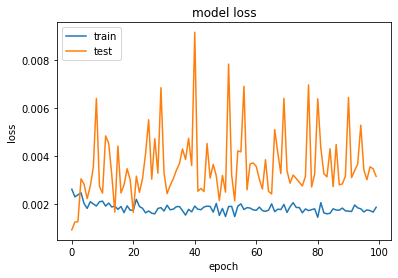

In [ ]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(('train', 'test'), loc='upper left')
plt.show()

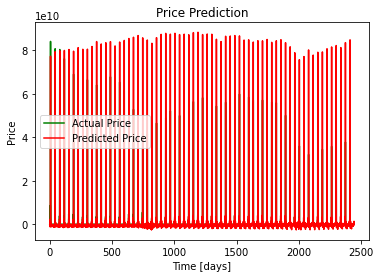

In [ ]:
# plot prediction 
y_test_inverse = scaler.inverse_transform(Monero_y_test)
y_hat_inverse = scaler.inverse_transform(preds)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Price Prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

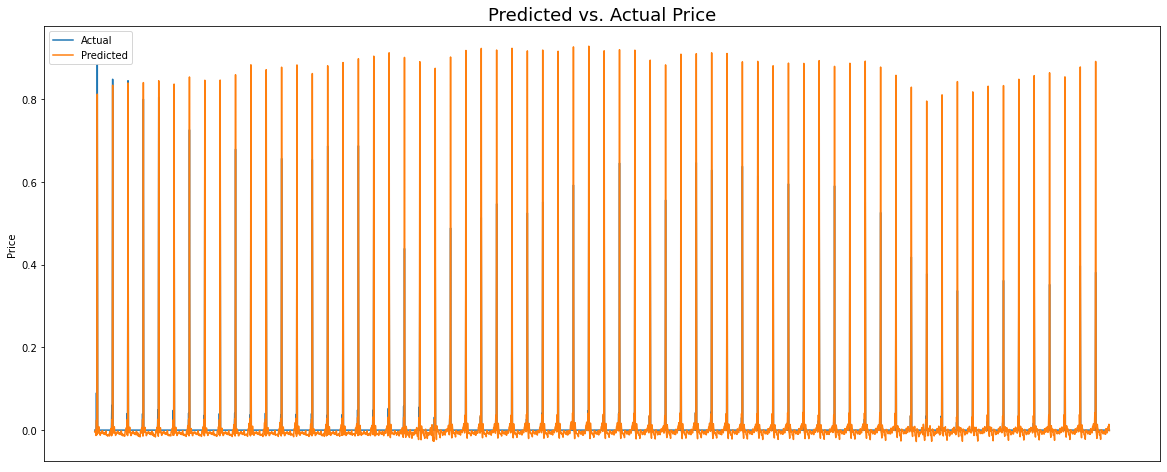

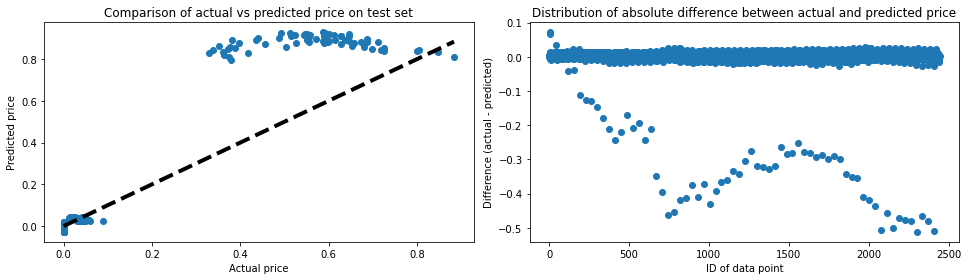

In [ ]:
# Plotting Actual vs Predicted Price
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(Monero_y_test)),Monero_y_test)
l2, = ax.plot(range(len(preds)),preds)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs. Actual Price', fontsize= 18)
plt.ylabel('Price')
plt.xticks([])
plt.show()
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

# First, plot the values for actual and predicted price
ax[0].scatter(Monero_y_test, preds)
ax[0].plot([Monero_y_test.min(), Monero_y_test.max()], [Monero_y_test.min(), Monero_y_test.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
ax[0].set_xlabel("Actual price")
ax[0].set_ylabel("Predicted price")
ax[0].set_title("Comparison of actual vs predicted price on test set")

# Next, plot the actual difference between both values
ax[1].plot(Monero_y_test-preds, marker = 'o', linestyle = '')
ax[1].set_xlabel("ID of data point")
ax[1].set_ylabel("Difference (actual - predicted)")
ax[1].set_title("Distribution of absolute difference between actual and predicted price")

fig.tight_layout()